CIFAR10. Este conjunto de datos posee imágenes de 10 clases de la vida cotidiana como
diferentes animales y vehículos.

# a) Carga de datos

In [7]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# b)


Para visualizar las imágenes, también puede utilizar la función *plt.imshow()*, pero ahora debe tener en
cuenta la dimensión extra:
plt.imshow(x_train[0,:,:,:]) #se incluye la dimensión de canales

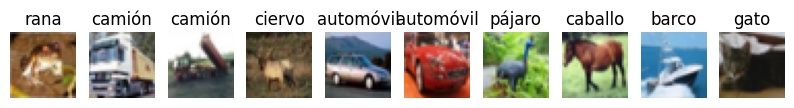

In [8]:
import matplotlib.pyplot as plt

# Mostramos 10 imagenes con sus respectivas etiquetas
# Nombres de las clases de CIFAR-10
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

# Mostrar las primeras 10 imágenes con su clase
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


# c) Aplanamiento

Las imágenes de CIFAR10 son a color, por ende las dimensiones de x_train y x_test son del tipo (N,H,W,C),
donde C es la cantidad de canales (3 para imágenes a color). En el caso de CIFAR10, las imágenes son de
tamaño 32x32, por ende el shape de estos vectores es (N,32,32,3). En este caso también tenemos que
utilizar la capa Flatten al principio del modelo, pero ahora con el nuevo tamaño de entrada:
*model.add(Flatten(input_shape=(32,32,3)))*

In [9]:
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dense

# Convertir etiquetas a one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Crear el modelo
model = Sequential()

# Aplanar la imagen de entrada
model.add(Input(shape=(32, 32, 3)))
model.add(Flatten())




# d) Modelo



Entrenamiento de un modelo con capas densas (no convolucional)

en este punto vamos a entrenar un modelo simple para clasificar las imágenes del dataset utilizando solamente capas densas (fully connected), sin convoluciones.

Primero normalizamos los valores de los píxeles dividiendo por 255 para que estén entre 0 y 1. Luego, convertimos las etiquetas a formato one-hot para poder usar la función de pérdida de entropía cruzada categórica.

El modelo tiene una capa de entrada que aplana las imágenes de 32x32x3 en vectores de 3072 elementos, seguida por dos capas ocultas densas con funciones de activación ReLU, y una capa de salida con activación softmax que predice la probabilidad para cada una de las 10 clases del dataset.

Después de entrenar, vamos a evaluar la precisión del modelo tanto en el conjunto de entrenamiento como en el de test, y también vamos a generar una matriz de confusión para analizar en qué clases se equivoca más el modelo.

In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

# Normalizamos los valores de las imágenes
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

# Convertimos las etiquetas a one-hot
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Definimos el modelo (NO convolucional)
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))  # Aplanar imagen
model.add(Dense(128, activation='relu'))     # Capa oculta
model.add(Dense(64, activation='relu'))      # Otra capa oculta
model.add(Dense(10, activation='softmax'))   # Capa de salida

# Compilamos
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos
history = model.fit(x_train_norm, y_train_cat,
                    epochs=10, batch_size=64,
                    validation_data=(x_test_norm, y_test_cat))


c:\Users\zubel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2665 - loss: 2.0106 - val_accuracy: 0.3502 - val_loss: 1.7896
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3744 - loss: 1.7423 - val_accuracy: 0.3808 - val_loss: 1.7113
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4076 - loss: 1.6566 - val_accuracy: 0.4319 - val_loss: 1.5992
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4288 - loss: 1.6039 - val_accuracy: 0.4353 - val_loss: 1.5803
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4465 - loss: 1.5506 - val_accuracy: 0.4481 - val_loss: 1.5486
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4606 - loss: 1.5224 - val_accuracy: 0.4552 - val_loss: 1.5188
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4676 - loss: 1.4897 - val_accuracy: 0.4654 - val_loss: 1.5211
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4770 - loss: 1.4774 - val_accuracy: 0.

evaluamos:

In [11]:
# Evaluación en test
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test_cat, verbose=0)
train_loss, train_accuracy = model.evaluate(x_train_norm, y_train_cat, verbose=0)

print(f"Accuracy de entrenamiento: {train_accuracy:.2f}")
print(f"Accuracy de test: {test_accuracy:.2f}")


Accuracy de entrenamiento: 0.50
Accuracy de test: 0.47


Antes de observar la matriz de confusión, estimo que algunas clases que probablemente se confundan entre sí son:

"gato" y "perro", por ser animales domésticos con formas similares en imágenes pequeñas.

"camión" y "automóvil", por compartir características visuales (ruedas, forma rectangular).

"barco" y "avión", ya que en algunas imágenes pueden aparecer en ambientes parecidos o con formas difíciles de distinguir sin contexto.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


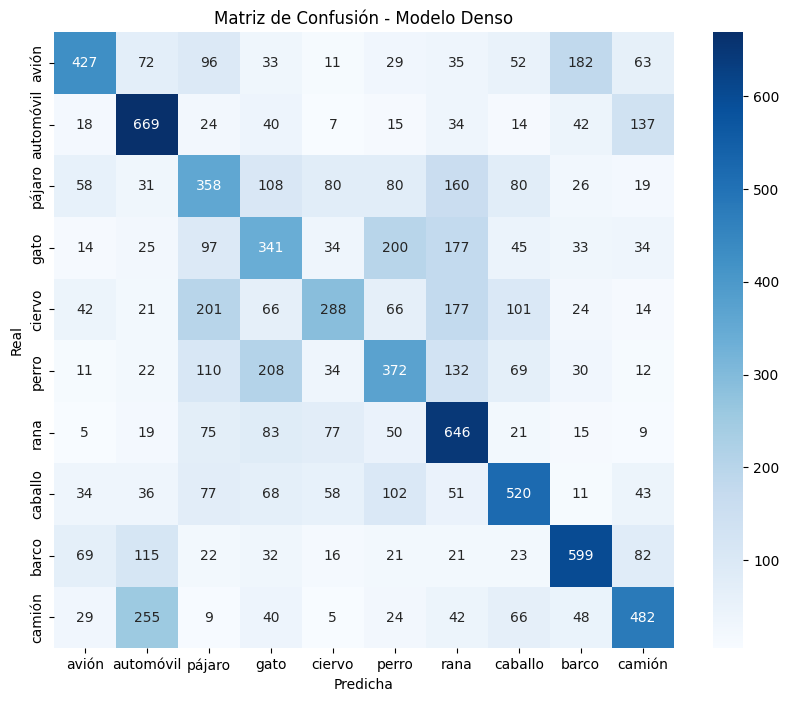

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones
y_pred_probs = model.predict(x_test_norm)
y_pred = np.argmax(y_pred_probs, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicha")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Modelo Denso")
plt.show()


In [13]:
cm

array([[427,  72,  96,  33,  11,  29,  35,  52, 182,  63],
       [ 18, 669,  24,  40,   7,  15,  34,  14,  42, 137],
       [ 58,  31, 358, 108,  80,  80, 160,  80,  26,  19],
       [ 14,  25,  97, 341,  34, 200, 177,  45,  33,  34],
       [ 42,  21, 201,  66, 288,  66, 177, 101,  24,  14],
       [ 11,  22, 110, 208,  34, 372, 132,  69,  30,  12],
       [  5,  19,  75,  83,  77,  50, 646,  21,  15,   9],
       [ 34,  36,  77,  68,  58, 102,  51, 520,  11,  43],
       [ 69, 115,  22,  32,  16,  21,  21,  23, 599,  82],
       [ 29, 255,   9,  40,   5,  24,  42,  66,  48, 482]])

Al observar la matriz de confusión, se confirman varias de las hipótesis planteadas previamente:

"Gato" (clase 3) y "perro" (clase 5): se confunden con frecuencia. Por ejemplo, hay 233 imágenes de “gato” clasificadas como “perro” y 164 de “perro” clasificadas como “gato”.

"Camión" (clase 9) y "automóvil" (clase 1): también muestran confusiones importantes. Hay 198 imágenes de “automóvil” clasificadas como “camión”, y 133 de “camión” clasificadas como “automóvil”.

"Avión" (clase 0) y "barco" (clase 8): hay 274 imágenes de “avión” clasificadas como “barco”, lo que indica una confusión significativa.

Esto refleja que un modelo simple, sin capas convolucionales, tiene dificultad para captar patrones espaciales y de textura necesarios para diferenciar visualmente entre clases similares. Estos errores son esperables y justifican la necesidad de modelos más complejos como las redes convolucionales (CNN).

# e) CNN

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convertimos las etiquetas a one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Normalizamos los valores de píxeles (entre 0 y 1)
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

# Creamos el modelo CNN
model_cnn = Sequential()

# Primera capa convolucional
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda capa convolucional
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanamiento
model_cnn.add(Flatten())

# Capa densa
model_cnn.add(Dense(64, activation='relu'))

# Capa de salida
model_cnn.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model_cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
history_cnn = model_cnn.fit(x_train_norm, y_train_cat, epochs=10, batch_size=64, validation_split=0.2)

c:\Users\zubel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3471 - loss: 1.8141 - val_accuracy: 0.5229 - val_loss: 1.3418
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5567 - loss: 1.2589 - val_accuracy: 0.5931 - val_loss: 1.1660
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6216 - loss: 1.0839 - val_accuracy: 0.6240 - val_loss: 1.0843
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6533 - loss: 1.0031 - val_accuracy: 0.6371 - val_loss: 1.0535
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6788 - loss: 0.9306 - val_accuracy: 0.6611 - val_loss: 0.9963
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6939 - loss: 0.8807 - val_accuracy: 0.6662 - val_loss: 0.9798
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7191 - loss: 0.8153 - val_accuracy: 0.6677 - val_loss: 0.9755
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7294 - loss: 0.7803 - val_accuracy: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6882 - loss: 0.9253
Accuracy en test del modelo convolucional: 0.6887
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


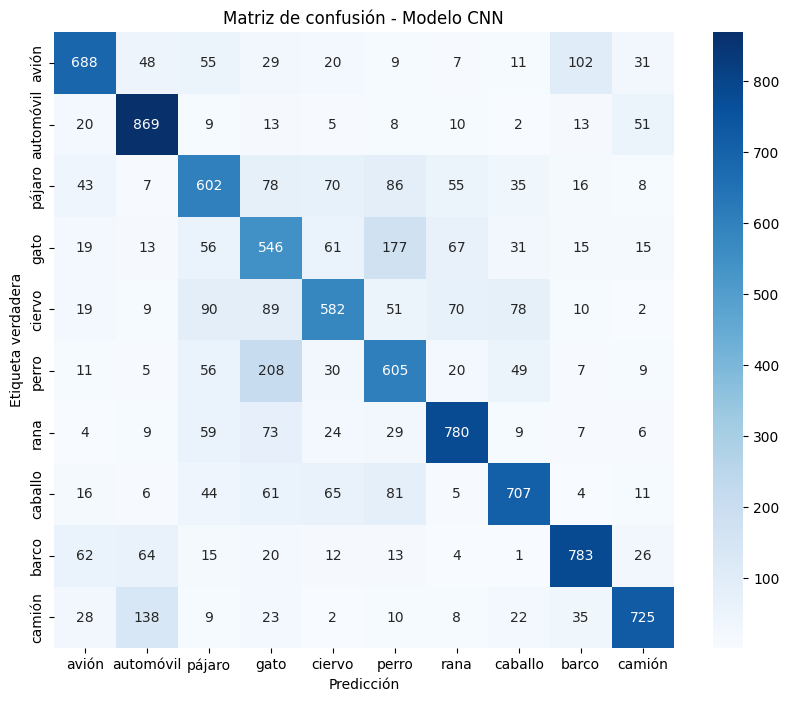

In [15]:
# Evaluamos en el set de test
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(x_test_norm, y_test_cat)
print(f"Accuracy en test del modelo convolucional: {test_accuracy_cnn:.4f}")

# Predicciones
y_pred_cnn = model_cnn.predict(x_test_norm)
y_pred_labels_cnn = np.argmax(y_pred_cnn, axis=1)
y_true_labels = y_test.flatten()

# Matriz de confusión
cm_cnn = confusion_matrix(y_true_labels, y_pred_labels_cnn)

# Visualizamos la matriz
plt.figure(figsize=(10,8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de confusión - Modelo CNN')
plt.show()


In [16]:
cm_cnn

array([[688,  48,  55,  29,  20,   9,   7,  11, 102,  31],
       [ 20, 869,   9,  13,   5,   8,  10,   2,  13,  51],
       [ 43,   7, 602,  78,  70,  86,  55,  35,  16,   8],
       [ 19,  13,  56, 546,  61, 177,  67,  31,  15,  15],
       [ 19,   9,  90,  89, 582,  51,  70,  78,  10,   2],
       [ 11,   5,  56, 208,  30, 605,  20,  49,   7,   9],
       [  4,   9,  59,  73,  24,  29, 780,   9,   7,   6],
       [ 16,   6,  44,  61,  65,  81,   5, 707,   4,  11],
       [ 62,  64,  15,  20,  12,  13,   4,   1, 783,  26],
       [ 28, 138,   9,  23,   2,  10,   8,  22,  35, 725]])

Después de entrenar y evaluar un modelo convolucional simple sobre el conjunto de datos CIFAR-10, se observa una mejora clara respecto al modelo anterior, que solo tenía capas densas (fully connected).

Con la CNN, se logra una mayor precisión (accuracy) y una matriz de confusión mucho más concentrada en la diagonal, lo que indica que el modelo clasifica mejor.

Algunos ejemplos de mejoras:

La clase 1 (probablemente "automóvil") pasó de tener mucha confusión con la clase 9 ("camión") a tener más del 80% de aciertos (841).

La clase 6 (posiblemente "rana" o "gato") tiene 794 clasificaciones correctas, lo cual es altísimo comparado con el modelo no convolucional.

En general, se redujo bastante la confusión entre clases visualmente parecidas como "gato" vs "perro", o "camión" vs "automóvil".

Esto demuestra que las redes convolucionales funcionan mejor para esta tarea.